![example](images/director_shot.jpeg)

# Project Title

**Authors:** Student 1, Student 2, Student 3
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Set theme and style for plots.
sns.set_theme('talk')
sns.set_style('darkgrid')

In [3]:
df = pd.read_csv('https://github.com/ds-papes/dsc-phase-4-project-clone/blob/main/data/Luxury_Beauty.csv?raw=true', names=['asin', 'user', 'rating', 'timestamp'])
df

,asin,user,rating,timestamp
0,B00004U9V2,A1Q6MUU0B2ZDQG,2.0,1276560000
1,B00004U9V2,A3HO2SQDCZIE9S,5.0,1262822400
2,B00004U9V2,A2EM03F99X3RJZ,5.0,1524009600
3,B00004U9V2,A3Z74TDRGD0HU,5.0,1524009600
4,B00004U9V2,A2UXFNW9RTL4VM,5.0,1523923200
...,...,...,...,...
574623,B01HIQEOLO,AHYJ78MVF4UQO,5.0,1489968000
574624,B01HIQEOLO,A1L2RT7KBNK02K,5.0,1477440000
574625,B01HIQEOLO,A36MLXQX9WPPW9,5.0,1475193600
574626,B01HJ2UY0W,A23DRCOMC2RIXF,1.0,1480896000


In [4]:
df['timestamp'] =  pd.to_datetime(df['timestamp'])
df

,asin,user,rating,timestamp
0,B00004U9V2,A1Q6MUU0B2ZDQG,2.0,1970-01-01 00:00:01.276560000
1,B00004U9V2,A3HO2SQDCZIE9S,5.0,1970-01-01 00:00:01.262822400
2,B00004U9V2,A2EM03F99X3RJZ,5.0,1970-01-01 00:00:01.524009600
3,B00004U9V2,A3Z74TDRGD0HU,5.0,1970-01-01 00:00:01.524009600
4,B00004U9V2,A2UXFNW9RTL4VM,5.0,1970-01-01 00:00:01.523923200
...,...,...,...,...
574623,B01HIQEOLO,AHYJ78MVF4UQO,5.0,1970-01-01 00:00:01.489968000
574624,B01HIQEOLO,A1L2RT7KBNK02K,5.0,1970-01-01 00:00:01.477440000
574625,B01HIQEOLO,A36MLXQX9WPPW9,5.0,1970-01-01 00:00:01.475193600
574626,B01HJ2UY0W,A23DRCOMC2RIXF,1.0,1970-01-01 00:00:01.480896000


In [5]:
df['timestamp'].value_counts()

1970-01-01 00:00:01.456790400    719
1970-01-01 00:00:01.433289600    612
1970-01-01 00:00:01.468454400    589
1970-01-01 00:00:01.516838400    578
1970-01-01 00:00:01.501027200    570
                                ... 
1970-01-01 00:00:01.201564800      1
1970-01-01 00:00:01.201305600      1
1970-01-01 00:00:01.101859200      1
1970-01-01 00:00:01.209945600      1
1970-01-01 00:00:01.105660800      1
Name: timestamp, Length: 4532, dtype: int64

In [120]:
df['asin'].value_counts()

B0013U0EYI    6954
B00172O9NO    6138
B00176GSEI    5262
B0017SWIU4    4300
B0002ZW5UQ    3460
              ... 
B0094XC4V2       1
B00N67R4YO       1
B01BMBNWGY       1
B008J72D2Y       1
B0031NYQQW       1
Name: asin, Length: 12120, dtype: int64

In [121]:
df.dtypes

asin          object
user          object
rating       float64
timestamp      int64
dtype: object

In [122]:
df['asin'].nunique()

12120

In [123]:
df['user'].nunique()

416174

In [124]:
df['rating'].value_counts()

5.0    382152
4.0     70481
1.0     50501
3.0     41988
2.0     29506
Name: rating, dtype: int64

In [125]:
df.isna().sum()

asin         0
user         0
rating       0
timestamp    0
dtype: int64

In [126]:
df[df.duplicated(keep=False)==True].head(20)

,asin,user,rating,timestamp
25,B00004U9V2,A1TQQZ6NVDTPNL,5.0,1521072000
26,B00004U9V2,A1TQQZ6NVDTPNL,5.0,1521072000
49,B00004U9V2,ADWW3BMPLYEKD,5.0,1517270400
50,B00004U9V2,ADWW3BMPLYEKD,5.0,1517270400
147,B00004U9V2,A2NB16B6V1DXL,5.0,1493164800
148,B00004U9V2,A2NB16B6V1DXL,5.0,1493164800
157,B00004U9V2,A2JNWWAE59JFH8,5.0,1491177600
158,B00004U9V2,A2JNWWAE59JFH8,5.0,1491177600
180,B00004U9V2,A1606LA683WZZU,5.0,1487980800
181,B00004U9V2,A1606LA683WZZU,5.0,1487980800


In [127]:
df.describe()

,rating,timestamp
count,574628.000000,5.746280e+05
mean,4.225622,1.447113e+09
std,1.297522,5.695908e+07
min,1.000000,1.075248e+09
25%,4.000000,1.414627e+09
50%,5.000000,1.455149e+09
75%,5.000000,1.490054e+09
max,5.000000,1.538179e+09


In [128]:
df['rating'].value_counts(normalize=True).sort_index(ascending=False)

5.0    0.665042
4.0    0.122655
3.0    0.073070
2.0    0.051348
1.0    0.087885
Name: rating, dtype: float64

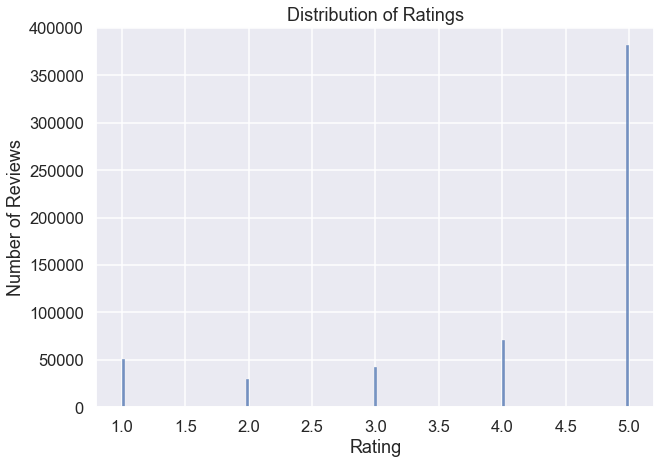

In [129]:
# Create bar plot of rating distribution.
fig, ax = plt.subplots(figsize=(10,7))

sns.histplot(data=df, x='rating', palette='cool_r')

ax.set_title('Distribution of Ratings')
ax.set_xlabel('Rating')
ax.set_ylabel('Number of Reviews');

## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [130]:
# Here you run your code to clean the data

In [131]:
asin_list = df['asin'].unique()

In [132]:
np.arange(len(asin_list))

array([    0,     1,     2, ..., 12117, 12118, 12119])

In [133]:
asin_lookup = dict(zip(np.arange(len(asin_list)), asin_list))

In [134]:
asin_map = dict(zip(asin_list, np.arange(len(asin_list))))

In [135]:
asin_map

{'B00004U9V2': 0,
 'B00005A77F': 1,
 'B00005NDTD': 2,
 'B00005V50C': 3,
 'B00005V50B': 4,
 'B000066SYB': 5,
 'B000068DWY': 6,
 'B00008WFSM': 7,
 'B0000Y3NO6': 8,
 'B0000ZREXG': 9,
 'B0000ZREXQ': 10,
 'B00011JU6I': 11,
 'B00011QUKW': 12,
 'B00012C5RS': 13,
 'B000142FVW': 14,
 'B000141PIG': 15,
 'B00014351Q': 16,
 'B0001433OU': 17,
 'B000141PYK': 18,
 'B00014340I': 19,
 'B0001435D4': 20,
 'B00014353E': 21,
 'B0001432PK': 22,
 'B00014GT8W': 23,
 'B0001EKVCW': 24,
 'B0001EKVGS': 25,
 'B0001EKTTC': 26,
 'B0001EL5KO': 27,
 'B0001EL5JA': 28,
 'B0001EL9BO': 29,
 'B0001EL0WC': 30,
 'B0001EL5OU': 31,
 'B0001EL59K': 32,
 'B0001EL5R2': 33,
 'B0001EL4DC': 34,
 'B0001EL39C': 35,
 'B0001EL5Q8': 36,
 'B0001EL4M8': 37,
 'B0001EKYEM': 38,
 'B0001F3QV4': 39,
 'B0001NAYOI': 40,
 'B0001QNLNG': 41,
 'B0001UWRCI': 42,
 'B0001XDU2Q': 43,
 'B0001XDTYA': 44,
 'B0001XDUBC': 45,
 'B0001XDTWM': 46,
 'B0001Y74TA': 47,
 'B0001Y74TU': 48,
 'B0001Y74XG': 49,
 'B0001Y74H2': 50,
 'B0001Y74KO': 51,
 'B0001Y74SG': 52,
 'B

In [136]:
df['asin'] = df['asin'].map(asin_map)

In [137]:
df

,asin,user,rating,timestamp
0,0,A1Q6MUU0B2ZDQG,2.0,1276560000
1,0,A3HO2SQDCZIE9S,5.0,1262822400
2,0,A2EM03F99X3RJZ,5.0,1524009600
3,0,A3Z74TDRGD0HU,5.0,1524009600
4,0,A2UXFNW9RTL4VM,5.0,1523923200
...,...,...,...,...
574623,6012,AHYJ78MVF4UQO,5.0,1489968000
574624,6012,A1L2RT7KBNK02K,5.0,1477440000
574625,6012,A36MLXQX9WPPW9,5.0,1475193600
574626,12118,A23DRCOMC2RIXF,1.0,1480896000


In [138]:
df = df.rename(columns={'asin': 'product_code'})

In [139]:
# df['product_code'].map(asin_lookup)

In [140]:
user_list = df['user'].unique()

In [141]:
np.arange(len(user_list))

array([     0,      1,      2, ..., 416171, 416172, 416173])

In [142]:
user_lookup = dict(zip(np.arange(len(user_list)), user_list))

In [143]:
user_map = dict(zip(user_list, np.arange(len(user_list))))

In [144]:
user_map

{'A1Q6MUU0B2ZDQG': 0,
 'A3HO2SQDCZIE9S': 1,
 'A2EM03F99X3RJZ': 2,
 'A3Z74TDRGD0HU': 3,
 'A2UXFNW9RTL4VM': 4,
 'AXX5G4LFF12R6': 5,
 'A7GUKMOJT2NR6': 6,
 'A3FU4L59BHA9FY': 7,
 'A1AMNMIPQMXH9M': 8,
 'A3DMBDTA8VGWSX': 9,
 'A160DTI3H7VHLQ': 10,
 'A1H41DKPDPVA0R': 11,
 'A2BDI7THUMJ8V': 12,
 'AM7EBP5TRX7AC': 13,
 'A31FOVCS3WTWPT': 14,
 'AXUU8F9EM6U3E': 15,
 'A24B46V78ATNRP': 16,
 'ABUBKML2EONCG': 17,
 'A2UA6E1RVG3C1I': 18,
 'A1TRMJHEDGX0HF': 19,
 'A2TTJS62322SXW': 20,
 'AX2K33SNI3WHN': 21,
 'ALX99DYO827ZK': 22,
 'A3PVVQ9MHYFTV9': 23,
 'A22NEUQTKWQM98': 24,
 'A1TQQZ6NVDTPNL': 25,
 'A32E3RVLI6D4TM': 26,
 'A3KUYXBMJ8AVIX': 27,
 'A3TMPSQ7X4M9LO': 28,
 'AUEUNR2AQQ0SY': 29,
 'A2P5MRZ68JX8EE': 30,
 'A8VD1E2O6N2KO': 31,
 'A1Q3N7GU27KGMA': 32,
 'A3QEV9GSI4HPA5': 33,
 'A2FMDHT0HNA3WY': 34,
 'A2QPHVVXS9FUBS': 35,
 'AL63CNA6X6IX8': 36,
 'A2N6AACMA6WOMN': 37,
 'A35I4FD5EARKTS': 38,
 'A2N8V79LWVR8F2': 39,
 'A2R9R1DJ9RHXOX': 40,
 'A60EV0X26JNB3': 41,
 'A3CG9DJUY5F2UY': 42,
 'AEDOSTGV48XO9': 43,
 'A21BQWP17Y

In [145]:
df['user'] = df['user'].map(user_map)

In [146]:
df

,product_code,user,rating,timestamp
0,0,0,2.0,1276560000
1,0,1,5.0,1262822400
2,0,2,5.0,1524009600
3,0,3,5.0,1524009600
4,0,4,5.0,1523923200
...,...,...,...,...
574623,6012,194479,5.0,1489968000
574624,6012,175357,5.0,1477440000
574625,6012,416172,5.0,1475193600
574626,12118,416173,1.0,1480896000


In [147]:
df['rating']=df['rating'].astype(np.int8)

In [148]:
df['product_code']=df['product_code'].astype(np.int32)

In [149]:
df['user']=df['user'].astype(np.int32)

In [150]:
df.dtypes

product_code    int32
user            int32
rating           int8
timestamp       int64
dtype: object

In [151]:
df.drop('timestamp', axis=1, inplace=True)
df

,product_code,user,rating
0,0,0,2
1,0,1,5
2,0,2,5
3,0,3,5
4,0,4,5
...,...,...,...
574623,6012,194479,5
574624,6012,175357,5
574625,6012,416172,5
574626,12118,416173,1


In [152]:
df.drop_duplicates(inplace=True)
df

,product_code,user,rating
0,0,0,2
1,0,1,5
2,0,2,5
3,0,3,5
4,0,4,5
...,...,...,...
574623,6012,194479,5
574624,6012,175357,5
574625,6012,416172,5
574626,12118,416173,1


In [153]:
df['product_code'].nunique()

12120

In [154]:
df['user'].nunique()

416174

In [155]:
df.groupby(by='product_code').agg('mean').sort_values('rating', ascending=False).head(20)

,user,rating
product_code,,
6060,358634.0,5.0
8191,306677.0,5.0
8198,313091.5,5.0
8199,387284.0,5.0
8203,387331.0,5.0
8207,387387.0,5.0
8209,387391.0,5.0
8214,387407.5,5.0
8215,218655.5,5.0


In [156]:
df.head(20)

,product_code,user,rating
0,0,0,2
1,0,1,5
2,0,2,5
3,0,3,5
4,0,4,5
5,0,5,5
6,0,6,5
7,0,7,5
8,0,8,5
9,0,9,5


In [157]:
# df.to_csv(r'data/Luxury_Beauty_reduced.csv', index=False)

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [158]:
# Here you run your code to model the data


In [159]:
%pip install scikit-surprise

Note: you may need to restart the kernel to use updated packages.


In [160]:
from surprise import Dataset, Reader
from surprise import accuracy
from surprise.prediction_algorithms import knns
from surprise.similarities import cosine, msd, pearson
from surprise.model_selection import cross_validate, train_test_split
from surprise.prediction_algorithms import SVD
from surprise.model_selection import GridSearchCV

In [161]:
data= df[['user', 'product_code', 'rating']]
reader= Reader(line_format= 'user item rating', sep= ',')
data= Dataset.load_from_df(data, reader=reader)

In [44]:
trainset, testset= train_test_split(data, test_size=0.25, random_state=42)

In [45]:
testset

[(188795, 2024, 1.0),
 (311026, 4453, 5.0),
 (16548, 200, 5.0),
 (256627, 3212, 5.0),
 (263708, 3354, 5.0),
 (9734, 44, 5.0),
 (410889, 5538, 4.0),
 (39708, 271, 5.0),
 (124912, 3208, 5.0),
 (262784, 3327, 5.0),
 (200905, 2194, 5.0),
 (210733, 2376, 5.0),
 (203708, 2234, 5.0),
 (255719, 3208, 1.0),
 (13935, 2254, 1.0),
 (297383, 4088, 1.0),
 (531, 5552, 4.0),
 (207075, 2300, 5.0),
 (330737, 5080, 5.0),
 (340, 3868, 5.0),
 (42474, 272, 5.0),
 (267228, 3436, 1.0),
 (346456, 5603, 1.0),
 (290318, 3898, 5.0),
 (371574, 1604, 2.0),
 (21658, 129, 5.0),
 (111074, 1039, 5.0),
 (166514, 1769, 5.0),
 (356537, 5972, 5.0),
 (42651, 272, 3.0),
 (60984, 443, 5.0),
 (45118, 299, 5.0),
 (120528, 1233, 5.0),
 (273370, 3576, 3.0),
 (415031, 5911, 5.0),
 (280341, 3728, 5.0),
 (409937, 11159, 5.0),
 (408430, 5317, 5.0),
 (345435, 5544, 1.0),
 (175310, 3494, 5.0),
 (237293, 2839, 5.0),
 (154660, 4342, 5.0),
 (118028, 1194, 4.0),
 (53847, 379, 5.0),
 (234990, 2805, 5.0),
 (164117, 1752, 5.0),
 (63655, 478, 

## KNN Basic

In [46]:
KNN_model= knns.KNNBasic(sim_options={'name': 'cosine', 'user_based': False}).fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [47]:
cross_validate(KNN_model, data, verbose= True, n_jobs=-1)

Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.2641  1.2611  1.2629  1.2643  1.2639  1.2633  0.0012  
MAE (testset)     0.9412  0.9399  0.9394  0.9390  0.9405  0.9400  0.0008  
Fit time          15.00   15.54   14.60   13.13   11.88   14.03   1.34    
Test time         2.77    1.84    1.47    1.24    1.14    1.69    0.59    


{'test_rmse': array([1.26410526, 1.26112656, 1.26289522, 1.26434941, 1.26385537]),
 'test_mae': array([0.94116459, 0.93988877, 0.93938758, 0.93900475, 0.94054424]),
 'fit_time': (15.000170946121216,
  15.539299964904785,
  14.59968900680542,
  13.134509801864624,
  11.878774881362915),
 'test_time': (2.774799108505249,
  1.8408491611480713,
  1.4661900997161865,
  1.2394201755523682,
  1.1395461559295654)}

In [48]:
KNN_model2= knns.KNNBasic(sim_options={'name': 'msd', 'user_based': False}).fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [49]:
cross_validate(KNN_model2, data, verbose= True, n_jobs=-1)

Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.2649  1.2611  1.2627  1.2613  1.2631  1.2626  0.0014  
MAE (testset)     0.9405  0.9383  0.9384  0.9377  0.9401  0.9390  0.0011  
Fit time          11.63   11.88   11.94   10.99   9.57    11.20   0.88    
Test time         2.03    1.84    1.42    1.30    1.09    1.54    0.35    


{'test_rmse': array([1.26490864, 1.26113181, 1.26266265, 1.26127299, 1.26311776]),
 'test_mae': array([0.94046019, 0.93830134, 0.93843122, 0.93766378, 0.9400979 ]),
 'fit_time': (11.632652997970581,
  11.882410764694214,
  11.94075894355774,
  10.993829727172852,
  9.568106174468994),
 'test_time': (2.0349843502044678,
  1.842940092086792,
  1.4217467308044434,
  1.3000800609588623,
  1.0942552089691162)}

In [50]:
KNN_model3= knns.KNNBasic(sim_options={'name': 'pearson', 'user_based': False}).fit(trainset)

Computing the pearson similarity matrix...
Done computing similarity matrix.


In [51]:
cross_validate(KNN_model3, data, verbose= True, n_jobs=-1)

Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.2632  1.2563  1.2613  1.2593  1.2612  1.2603  0.0023  
MAE (testset)     0.9598  0.9551  0.9587  0.9560  0.9569  0.9573  0.0017  
Fit time          20.56   25.48   24.26   21.51   18.94   22.15   2.40    
Test time         5.83    2.09    1.88    1.83    1.45    2.62    1.62    


{'test_rmse': array([1.26322001, 1.25628931, 1.26133705, 1.25931685, 1.26115864]),
 'test_mae': array([0.95984752, 0.95508838, 0.95871148, 0.95602887, 0.95691861]),
 'fit_time': (20.558293104171753,
  25.483539819717407,
  24.260090112686157,
  21.505112886428833,
  18.940056085586548),
 'test_time': (5.831889867782593,
  2.0920450687408447,
  1.8766870498657227,
  1.8263189792633057,
  1.450016975402832)}

In [52]:
KNN_model4= knns.KNNBasic(sim_options={'name': 'pearson_baseline', 'user_based': False}).fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [53]:
cross_validate(KNN_model4, data, verbose= True, n_jobs=-1)

Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.2618  1.2601  1.2576  1.2574  1.2590  1.2592  0.0017  
MAE (testset)     0.9504  0.9501  0.9491  0.9479  0.9495  0.9494  0.0009  
Fit time          18.49   20.50   21.66   18.91   17.96   19.50   1.37    
Test time         3.42    2.26    1.57    1.48    1.06    1.96    0.82    


{'test_rmse': array([1.26181051, 1.26013552, 1.25756203, 1.25740066, 1.25901422]),
 'test_mae': array([0.95038922, 0.9501464 , 0.94913155, 0.94787555, 0.94946684]),
 'fit_time': (18.487215042114258,
  20.50299096107483,
  21.658148050308228,
  18.905744791030884,
  17.959627151489258),
 'test_time': (3.4156298637390137,
  2.2620632648468018,
  1.5690560340881348,
  1.4797282218933105,
  1.0604679584503174)}

## KNN With Means

In [54]:
KNN_model= knns.KNNWithMeans(sim_options={'name': 'cosine', 'user_based': False}).fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [55]:
cross_validate(KNN_model, data, verbose= True, n_jobs=-1)

Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.2634  1.2642  1.2566  1.2604  1.2591  1.2607  0.0028  
MAE (testset)     0.9461  0.9456  0.9412  0.9422  0.9415  0.9433  0.0021  
Fit time          17.85   20.52   19.64   17.94   15.92   18.37   1.59    
Test time         4.25    1.74    1.55    1.45    1.33    2.07    1.10    


{'test_rmse': array([1.26335969, 1.26415243, 1.2565638 , 1.26039143, 1.25906062]),
 'test_mae': array([0.94610413, 0.94559678, 0.94119667, 0.94221399, 0.94146366]),
 'fit_time': (17.846580028533936,
  20.51842212677002,
  19.637890815734863,
  17.935025930404663,
  15.922667980194092),
 'test_time': (4.253688812255859,
  1.7383787631988525,
  1.5510742664337158,
  1.4519281387329102,
  1.3310561180114746)}

In [56]:
KNN_model2= knns.KNNWithMeans(sim_options={'name': 'msd', 'user_based': False}).fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [57]:
cross_validate(KNN_model2, data, verbose= True, n_jobs=-1)

Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.2573  1.2589  1.2600  1.2616  1.2660  1.2608  0.0030  
MAE (testset)     0.9407  0.9424  0.9421  0.9427  0.9458  0.9428  0.0017  
Fit time          12.02   13.05   15.65   15.16   13.38   13.85   1.36    
Test time         2.38    3.17    1.67    1.25    1.18    1.93    0.75    


{'test_rmse': array([1.25732097, 1.2588617 , 1.25996344, 1.26163288, 1.26604474]),
 'test_mae': array([0.94074516, 0.94240415, 0.94208298, 0.94273611, 0.9457848 ]),
 'fit_time': (12.015257120132446,
  13.050113916397095,
  15.650049924850464,
  15.161051034927368,
  13.380553007125854),
 'test_time': (2.3779308795928955,
  3.170423984527588,
  1.667090892791748,
  1.2524070739746094,
  1.1831119060516357)}

In [58]:
KNN_model3= knns.KNNWithMeans(sim_options={'name': 'pearson', 'user_based': False}).fit(trainset)

Computing the pearson similarity matrix...
Done computing similarity matrix.


In [59]:
cross_validate(KNN_model3, data, verbose= True, n_jobs=-1)

Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.2616  1.2584  1.2637  1.2583  1.2582  1.2601  0.0022  
MAE (testset)     0.9558  0.9540  0.9577  0.9532  0.9538  0.9549  0.0017  
Fit time          18.61   18.42   17.05   15.60   14.08   16.75   1.72    
Test time         2.20    1.94    1.88    1.26    1.19    1.69    0.40    


{'test_rmse': array([1.26164079, 1.25844543, 1.26373152, 1.25828814, 1.2582349 ]),
 'test_mae': array([0.95582026, 0.9540142 , 0.95774446, 0.95324076, 0.95375272]),
 'fit_time': (18.608158111572266,
  18.421042919158936,
  17.05463194847107,
  15.59748101234436,
  14.075154066085815),
 'test_time': (2.1999573707580566,
  1.941978931427002,
  1.8759589195251465,
  1.2585248947143555,
  1.1931300163269043)}

In [60]:
KNN_model4= knns.KNNWithMeans(sim_options={'name': 'pearson_baseline', 'user_based': False}).fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [61]:
cross_validate(KNN_model4, data, verbose= True, n_jobs=-1)

Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.2595  1.2613  1.2567  1.2586  1.2576  1.2587  0.0016  
MAE (testset)     0.9501  0.9511  0.9498  0.9493  0.9486  0.9498  0.0008  
Fit time          15.20   18.17   16.43   15.39   14.50   15.94   1.28    
Test time         3.78    1.52    1.38    1.38    1.25    1.86    0.96    


{'test_rmse': array([1.25952416, 1.26131625, 1.25665515, 1.25856938, 1.25763224]),
 'test_mae': array([0.95010572, 0.95110341, 0.94982088, 0.94925341, 0.94858459]),
 'fit_time': (15.19690203666687,
  18.169557809829712,
  16.43183994293213,
  15.388345956802368,
  14.504912853240967),
 'test_time': (3.777707815170288,
  1.5166242122650146,
  1.3848650455474854,
  1.3771939277648926,
  1.249385118484497)}

## SVD

In [62]:
svd = SVD()

In [63]:
svd.fit(trainset)

In [64]:
predictions= svd.test(testset)
accuracy.rmse(predictions)

RMSE: 1.2395


1.2395451720362254

In [65]:
accuracy.mae(predictions)

MAE:  0.9545


0.9545159646300226

In [66]:
param_grid = {'n_factors':[110, 130],'n_epochs': [25, 30], 'lr_all': [0.025, 0.05],
              'reg_all': [0.1, 0.2]}
gs_model = GridSearchCV(SVD,param_grid=param_grid,joblib_verbose=5, n_jobs=-1)
gs_model.fit(data)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 17.9min finished


In [67]:
gs_model.best_params

{'rmse': {'n_factors': 110, 'n_epochs': 30, 'lr_all': 0.025, 'reg_all': 0.1},
 'mae': {'n_factors': 110, 'n_epochs': 30, 'lr_all': 0.05, 'reg_all': 0.1}}

In [68]:
# use best params
svd = SVD(n_factors=130, n_epochs=30, lr_all=0.025, reg_all=0.1)
svd.fit(trainset)
predictions = svd.test(testset)
print(accuracy.rmse(predictions))

RMSE: 1.2240
1.2239799890334093


In [69]:
print(accuracy.mae(predictions))

MAE:  0.9320
0.9319821947246414


In [70]:
param_grid = {'n_factors':[130, 150],'n_epochs': [30, 40], 'lr_all': [0.01, 0.025],
              'reg_all': [0.05, 0.1]}
gs_model = GridSearchCV(SVD,param_grid=param_grid,joblib_verbose=5, n_jobs=-1)
gs_model.fit(data)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed: 15.5min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 23.0min finished


In [71]:
gs_model.best_params

{'rmse': {'n_factors': 130, 'n_epochs': 40, 'lr_all': 0.025, 'reg_all': 0.1},
 'mae': {'n_factors': 130, 'n_epochs': 40, 'lr_all': 0.025, 'reg_all': 0.05}}

In [72]:
# use best params
svd = SVD(n_factors=150, n_epochs=40, lr_all=0.025, reg_all=0.1)
svd.fit(trainset)
predictions = svd.test(testset)
print(accuracy.rmse(predictions))
print(accuracy.mae(predictions))

RMSE: 1.2231
1.2231045736986903
MAE:  0.9292
0.9292405011049342


In [73]:
param_grid = {'n_factors':[150, 200],'n_epochs': [40, 50], 'lr_all': [0.025],
              'reg_all': [0.1]}
gs_model = GridSearchCV(SVD,param_grid=param_grid,joblib_verbose=5, n_jobs=-1)
gs_model.fit(data)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:  6.0min remaining:  6.0min
[Parallel(n_jobs=-1)]: Done  15 out of  20 | elapsed:  6.7min remaining:  2.2min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  8.5min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  8.5min finished


In [74]:
gs_model.best_params

{'rmse': {'n_factors': 150, 'n_epochs': 50, 'lr_all': 0.025, 'reg_all': 0.1},
 'mae': {'n_factors': 150, 'n_epochs': 50, 'lr_all': 0.025, 'reg_all': 0.1}}

In [75]:
# use best params
svd = SVD(lr_all=0.025, n_epochs=50, n_factors=150, reg_all=0.1)
svd.fit(trainset)
predictions = svd.test(testset)
print(accuracy.rmse(predictions))
print(accuracy.mae(predictions))

RMSE: 1.2223
1.222339514018362
MAE:  0.9264
0.926394892826063


## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Making Recommendations

In [7]:
meta_df = pd.read_json('../data/meta_Luxury_Beauty.json.gz', lines=True)
meta_df

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes
0,[],,[After a long day of handling thorny situation...,,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,"[B00GHX7H0A, B00FRERO7G, B00R68QXCS, B000Z65AZ...",,,[],"4,324 in Beauty & Personal Care (","[B00FRERO7G, B00GHX7H0A, B07GFHJRMX, B00TJ3NBN...",{' Product Dimensions: ': '2.2 x 2.2 ...,Luxury Beauty,,NaT,$30.00,B00004U9V2,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
1,[],,[If you haven't experienced the pleasures of b...,,AHAVA Bath Salts,[],,,[],"1,633,549 in Beauty & Personal Care (",[],{' Product Dimensions: ': '3 x 3.5 x ...,Luxury Beauty,,NaT,,B0000531EN,[],[]
2,[],,"[Rich, black mineral mud, harvested from the b...",,"AHAVA Dead Sea Mineral Mud, 8.5 oz, Pack of 4",[],,,[],"1,806,710 in Beauty &amp; Personal Care (",[],{' Product Dimensions: ': '5.1 x 3 x ...,Luxury Beauty,,NaT,,B0000532JH,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
3,[],,[This liquid soap with convenient pump dispens...,,"Crabtree &amp; Evelyn Hand Soap, Gardeners, 10...",[],,,[],[],"[B00004U9V2, B00GHX7H0A, B00FRERO7G, B00R68QXC...",{' Product Dimensions: ': '2.6 x 2.6 ...,Luxury Beauty,,NaT,$15.99,B00005A77F,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
4,[],,[Remember why you love your favorite blanket? ...,,Soy Milk Hand Crme,"[B000NZT6KM, B001BY229Q, B008J724QY, B0009YGKJ...",,,[],"42,464 in Beauty &amp; Personal Care (",[],{' Product Dimensions: ': '7.2 x 2.2 ...,Luxury Beauty,,NaT,$18.00,B00005NDTD,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12294,[],,"[, CND Craft Culture Collection: Patina Buckle...",,"CND Shellac Power Polish, Patina Buckle","[B003ONLAXQ, B00YDEZ9T6, B074KHRD13, B00R3PZK1...",,,[],"88,740 in Beauty & Personal Care (","[B00D2VMUA2, B074KJZJYW, B074KHRD13, B073SB9JW...","{' Item Weight: ': '0.48 ounces', 'Sh...",Luxury Beauty,,NaT,$15.95,B01HIQIEYC,[],[]
12295,[],,[CND Shellac was designed to be used as a syst...,,CND Shellac power polish denim patch,"[B003ONLAXQ, B003OH0KBA, B004LEMWGG, B01MT91G4...",,,[],"122,331 in Beauty & Personal Care (","[B00D2VMUA2, B01L0EV8X2, B004LEMWGG, B00EFGDYZ...","{'Shipping Weight:': '1.4 ounces (', 'ASIN:': ...",Luxury Beauty,,NaT,$15.95,B01HIQHQU0,[],[]
12296,[],,[CND Shellac was designed to be used as a syst...,,"CND Shellac, Leather Satchel","[B003ONLAXQ, B003OH0KBA, B004LEMWGG, B01MT91G4...",,,[],"168,028 in Beauty & Personal Care (","[B00D2VMUA2, B01L0EV8X2, B004LEMWGG, B00EFGDYZ...","{'Shipping Weight:': '1.4 ounces (', 'Domestic...",Luxury Beauty,,NaT,$15.95,B01HIQEOLO,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
12297,[],,[The I AM JUICY COUTURE girl is once again tak...,,"Juicy Couture I Love Juicy Couture, 1.7 fl. Oz...",[],,,[],"490,755 in Beauty & Personal Care (","[B0757439SY, B01HJ2UY1G, B01KX3TK7C, B01LX71LJ...",{' Product Dimensions: ': '3.3 x 2.7 ...,Luxury Beauty,,NaT,$76.00,B01HJ2UY0W,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...


In [223]:
pd.options.display.max_colwidth = 100
pd.options.display.max_rows = 500

In [224]:
meta_df = meta_df[['asin', 'title']]
meta_df

,asin,title
0,B00004U9V2,Crabtree &amp; Evelyn - Gardener's Ultra-Moisturising Hand Therapy Pump - 250g/8.8 OZ
1,B0000531EN,AHAVA Bath Salts
2,B0000532JH,"AHAVA Dead Sea Mineral Mud, 8.5 oz, Pack of 4"
3,B00005A77F,"Crabtree &amp; Evelyn Hand Soap, Gardeners, 10.1 fl. oz."
4,B00005NDTD,Soy Milk Hand Crme
...,...,...
12294,B01HIQIEYC,"CND Shellac Power Polish, Patina Buckle"
12295,B01HIQHQU0,CND Shellac power polish denim patch
12296,B01HIQEOLO,"CND Shellac, Leather Satchel"
12297,B01HJ2UY0W,"Juicy Couture I Love Juicy Couture, 1.7 fl. Oz., perfume for women"


In [226]:
meta_df = meta_df.drop_duplicates()

In [227]:
meta_df = meta_df.replace({"asin": asin_map})
meta_df

,asin,title
0,0,Crabtree &amp; Evelyn - Gardener's Ultra-Moisturising Hand Therapy Pump - 250g/8.8 OZ
1,6013,AHAVA Bath Salts
2,6014,"AHAVA Dead Sea Mineral Mud, 8.5 oz, Pack of 4"
3,1,"Crabtree &amp; Evelyn Hand Soap, Gardeners, 10.1 fl. oz."
4,2,Soy Milk Hand Crme
...,...,...
12294,6011,"CND Shellac Power Polish, Patina Buckle"
12295,6010,CND Shellac power polish denim patch
12296,6012,"CND Shellac, Leather Satchel"
12297,12118,"Juicy Couture I Love Juicy Couture, 1.7 fl. Oz., perfume for women"


In [228]:
meta_df = meta_df.rename(columns={'asin': 'product_code'})

In [229]:
meta_df

,product_code,title
0,0,Crabtree &amp; Evelyn - Gardener's Ultra-Moisturising Hand Therapy Pump - 250g/8.8 OZ
1,6013,AHAVA Bath Salts
2,6014,"AHAVA Dead Sea Mineral Mud, 8.5 oz, Pack of 4"
3,1,"Crabtree &amp; Evelyn Hand Soap, Gardeners, 10.1 fl. oz."
4,2,Soy Milk Hand Crme
...,...,...
12294,6011,"CND Shellac Power Polish, Patina Buckle"
12295,6010,CND Shellac power polish denim patch
12296,6012,"CND Shellac, Leather Satchel"
12297,12118,"Juicy Couture I Love Juicy Couture, 1.7 fl. Oz., perfume for women"


In [230]:
def product_search():
    query_product = input('Search a brand or product: ')
    num_results = int(input('Up to how many results would you like to see? '))
    search_results = meta_df[meta_df['title'].str.contains(query_product, case=False, na=False)].head(num_results)
    
    return search_results

In [231]:
product_search()

Search a brand or product: occitane
Up to how many results would you like to see? 20


,product_code,title
530,7543,"L'Occitane Shea Butter Lip Balm Stick for Unisex, 0.17 Ounce"
569,248,L'Occitane Cleansing Verbena Liquid with Organic Verbena Extract
815,420,"L'Occitane Refreshing Verbena Eau de Toilette, 3.3 fl. oz."
816,419,"L'Occitane Almond Milk Concentrate, 7 fl. oz."
817,6167,"L'Occitane Foaming Verbena Bubble Bath with Organic Verbena Extract, 16.9 fl. oz."
892,467,L'Occitane Citrus Verbena Summer Fragrance
1080,590,"L'Occitane Green Tea Eau de Toilette, 0.6 fl. oz."
1081,7832,"L'Occitane Verbena Eau de Toilette, 1.7 fl. oz."
1441,825,"L'Occitane Citrus Verbena Daily Use Shampoo, 8.4 fl. oz."
1443,6325,L'Occitane Rose 4 Reines Bath &amp; Shower Gel


In [232]:
df['user'].sort_values().tail()

574619    416169
574620    416170
574621    416171
574625    416172
574626    416173
Name: user, dtype: int32

In [233]:
def user_ratings():
    list_of_products = [int(x) for x in input('Enter product codes preferred by customer (separate by spaces): ').split()]
    my_ratings = []
    
    for product in list_of_products:
        my_ratings.append({'user': 600000, 'product_code': product, 'rating': '1'})
    
    ## add the new ratings to the original ratings DataFrame
    new_ratings_df = df.append(my_ratings,ignore_index=True)
    reader = Reader(line_format='item user rating')
    new_data = Dataset.load_from_df(new_ratings_df,reader)
    
    # train a model using the new combined DataFrame
    svd_ = SVD(lr_all=0.025, n_epochs=50, n_factors=150, reg_all=0.1)
    svd_.fit(new_data.build_full_trainset())
    
    # make predictions for the user
    # you'll probably want to create a list of tuples in the format (movie_id, predicted_score)
    list_of_predictions = []
    for item in df['product_code'].unique():
        list_of_predictions.append((item, svd_.predict(600000, item)[3]))
    
    # order the predictions from highest to lowest rated
    ranked_predictions = sorted(list_of_predictions, key=lambda x:x[1], reverse=True)
    
    ranked_df = pd.DataFrame(ranked_predictions, columns=['product_code', 'rating'])
    
    merged_df = ranked_df.merge(meta_df, how='inner', on='product_code')
    
    
    
    return merged_df.head(20)

In [176]:
user_ratings()

Enter product codes preferred by customer (separate by spaces): 40 5 95


,product_code,rating,title
0,10265,4.992498,"SKIN &amp; CO Women's Umbrian Truffle Body Oil, 4 fl. oz."
1,7532,4.951196,"Indie Lee Lemongrass Citrus Body Wash, 8 fl. oz."
2,9387,4.942231,"Alfaparf Milano Alfaparf Semi Di Lino Discipline Frizz Control Butter Mask, 17.28 Fl Oz"
3,9680,4.926270,Supergoop! City &amp; Sand Sunscreen Travel Tote
4,10503,4.923958,Laura Geller Gel Eyeliner Pencil - Fade to Grey
5,1867,4.920372,"KAPLAN MD Lip 20 Moisture Therapy plus Sunscreen SPF 20- Ruby, 0.11 oz."
6,10353,4.915032,BABOR SPA Shaping for Body Feet Smoothing Balm for Feet 4.25 oz &ndash; Best Natural Foot Cream ...
7,798,4.913949,"Glo Skin Beauty Pressed Base - Mineral Makeup Pressed Powder Foundation, 20 Shades|Cruelty Free"
8,10629,4.910381,"StriVectin Ageless Essentials Collection, 5.76 oz."
9,8359,4.910135,Malibu C Scalp Therapy Treatment


In [88]:
user_ratings()

Enter product codes preferred by customer (separate by spaces): 40 5 95


,product_code,rating,title
0,10265,5.000000,"SKIN &amp; CO Women's Umbrian Truffle Body Oil, 4 fl. oz."
1,7532,4.964865,"Indie Lee Lemongrass Citrus Body Wash, 8 fl. oz."
2,1867,4.930956,"KAPLAN MD Lip 20 Moisture Therapy plus Sunscreen SPF 20- Ruby, 0.11 oz."
3,8359,4.923267,Malibu C Scalp Therapy Treatment
4,10629,4.915855,"StriVectin Ageless Essentials Collection, 5.76 oz."
5,10326,4.912374,Georgie Beauty Deux Coeurs Luxury Edition Bridal Lash Compact
6,10353,4.906688,BABOR SPA Shaping for Body Feet Smoothing Balm for Feet 4.25 oz &ndash; Best Natural Foot Cream ...
7,9660,4.899683,"FRAMESI Be Yourself Hydro-Gel Light , 5.1 Ounce"
8,7339,4.895274,"The Art of Shaving Pre-Shave Oil, Lemon, 1 oz"
9,9387,4.881947,"Alfaparf Milano Alfaparf Semi Di Lino Discipline Frizz Control Butter Mask, 17.28 Fl Oz"


In [ ]:
user_ratings()

In [234]:
list_of_products = [int(x) for x in input('Enter product codes preferred by customer (separate by spaces): ').split()]
my_ratings = []

for product in list_of_products:
    my_ratings.append({'user': 600000, 'product_code': product, 'rating': '5'})

my_ratings

Enter product codes preferred by customer (separate by spaces): 7543 420 6325 1037 6603 6619 6626


[{'user': 600000, 'product_code': 7543, 'rating': '5'},
 {'user': 600000, 'product_code': 420, 'rating': '5'},
 {'user': 600000, 'product_code': 6325, 'rating': '5'},
 {'user': 600000, 'product_code': 1037, 'rating': '5'},
 {'user': 600000, 'product_code': 6603, 'rating': '5'},
 {'user': 600000, 'product_code': 6619, 'rating': '5'},
 {'user': 600000, 'product_code': 6626, 'rating': '5'}]

In [235]:
## add the new ratings to the original ratings DataFrame
new_ratings_df = df.append(my_ratings,ignore_index=True)
reader = Reader(line_format='item user rating')
new_data = Dataset.load_from_df(new_ratings_df,reader)
new_ratings_df.tail(20)

,product_code,user,rating
536282,12117,416168,5
536283,6012,333707,5
536284,6012,194398,5
536285,6012,194404,5
536286,6012,416169,5
536287,6012,416170,5
536288,6012,416171,5
536289,6012,194545,5
536290,6012,194479,5
536291,6012,175357,5


In [258]:
# train a model using the new combined DataFrame
svd_final = SVD(lr_all=0.025, n_epochs=50, n_factors=150, reg_all=0.1)
svd_final.fit(new_data.build_full_trainset())

# make predictions for the user
# you'll probably want to create a list of tuples in the format (movie_id, predicted_score)
list_of_predictions = []
for item in df['product_code'].unique():
    list_of_predictions.append((item, svd_final.predict(4000, item)[3]))

# order the predictions from highest to lowest rated
ranked_predictions = sorted(list_of_predictions, key=lambda x:x[1], reverse=True)

ranked_df = pd.DataFrame(ranked_predictions, columns=['product_code', 'rating'])

merged_df = ranked_df.merge(meta_df, how='inner', on='product_code')

merged_df

,product_code,rating,title
0,7320,5.000000,Photoderm Self-tanner 5.0 fl oz
1,7396,5.000000,VINCENT LONGO Pearl X Eye Shadow
2,7579,5.000000,MenScience Androceuticals Post-Workout Accelerated Recovery Formula
3,7843,5.000000,Stacey Frasca Studio 28 Blush
4,9378,5.000000,Archipelago Botanicals Coconut Soap
...,...,...,...
12106,283,2.013860,Aramis for Men - 2.6 oz Antiperspirant Deodorant Stick
12107,184,2.010314,"Tea Tree Styling Wax, 6.8 Fl Oz"
12108,23,2.000093,"Dermablend Cover Creme Full Coverage Foundation with SPF 30, 1 Oz"
12109,10395,1.926511,Borghese Eclissare Color Eclipse Color Edge Eye Pencils Pitch Black


In [259]:
list_of_predictions

[(0, 2.97513529888292),
 (1, 4.51599989466637),
 (2, 4.648449176863926),
 (3, 4.592806417663012),
 (4, 4.736751204879887),
 (5, 4.509968767128716),
 (6, 4.441253092651165),
 (7, 4.554069981413509),
 (8, 4.605625318148446),
 (9, 4.613310336112584),
 (10, 4.48923964070341),
 (11, 4.377595967673987),
 (12, 4.527220354368518),
 (13, 4.546971719538288),
 (14, 4.6961649853468606),
 (15, 4.017158627062232),
 (16, 4.238439294762005),
 (17, 4.49997932083841),
 (18, 4.549503859061489),
 (19, 2.2959969769324835),
 (20, 4.329897376424153),
 (21, 4.673017889519857),
 (22, 4.456991939120484),
 (23, 2.0000934004335957),
 (24, 4.504457612022973),
 (25, 4.640457903143148),
 (26, 4.592936633554879),
 (27, 4.548337125502607),
 (28, 3.4741625150621314),
 (29, 4.0132364411931425),
 (30, 2.300241453914713),
 (31, 4.685344382801693),
 (32, 4.3432393502716495),
 (33, 4.4345692331348365),
 (34, 4.581793438206482),
 (35, 4.5902742640798735),
 (36, 4.763121835656089),
 (37, 4.599876967900549),
 (38, 3.8467101492

In [260]:
merged_df.head(30)

,product_code,rating,title
0,7320,5.000000,Photoderm Self-tanner 5.0 fl oz
1,7396,5.000000,VINCENT LONGO Pearl X Eye Shadow
2,7579,5.000000,MenScience Androceuticals Post-Workout Accelerated Recovery Formula
3,7843,5.000000,Stacey Frasca Studio 28 Blush
4,9378,5.000000,Archipelago Botanicals Coconut Soap
5,9680,5.000000,Supergoop! City &amp; Sand Sunscreen Travel Tote
6,9695,5.000000,P&Uuml;R Browder Brow Perfecting Powder
7,9817,5.000000,MONTALE Full Incense Eau De Parfum 1.7 oz
8,10222,5.000000,"CHI Elite Chevron Metallic Flat Iron, 1&quot; Gift Set"
9,10265,5.000000,"SKIN &amp; CO Women's Umbrian Truffle Body Oil, 4 fl. oz."


In [253]:
df[df['user']==4000]

,product_code,user,rating
4112,14,4000,5
5827,20,4000,5
86517,651,4000,5


In [257]:
meta_df[meta_df['product_code']==14]

,product_code,title
21,14,"OPI Nail Lacquer, Not So Bora-Bora-ing Pink, 0.5 Fl Oz"


## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***

In [ ]:
meta_df[meta_df['product_code']==3665]